In [21]:
library(TSA)
library(data.table)
library(corrplot)

### 1. Read and show the raw data

In [6]:
building_metadata=fread("/Users/Lotus/Desktop/stevens/MA641/final/raw_data/building_metadata.csv")

In [5]:
train=fread("/Users/Lotus/Desktop/stevens/MA641/final/raw_data/train.csv")

In [3]:
sample_submission=fread("/Users/Lotus/Desktop/stevens/MA641/final/raw_data/sample_submission.csv")
weather_train=fread("/Users/Lotus/Desktop/stevens/MA641/final/raw_data/weather_train.csv")

In [7]:
tail(train)
tail(building_metadata)
tail(sample_submission)
tail(weather_train)

building_id,meter,timestamp,meter_reading
<int>,<int>,<dttm>,<dbl>
1443,0,2016-12-31 23:00:00,64.950
1444,0,2016-12-31 23:00:00,8.750
1445,0,2016-12-31 23:00:00,4.825
1446,0,2016-12-31 23:00:00,0.000
1447,0,2016-12-31 23:00:00,159.575
1448,0,2016-12-31 23:00:00,2.850


site_id,building_id,primary_use,square_feet,year_built,floor_count
<int>,<int>,<chr>,<int>,<int>,<int>
15,1443,Education,40311,1913,NA
15,1444,Entertainment/public assembly,19619,1914,NA
15,1445,Education,4298,NA,NA
15,1446,Entertainment/public assembly,11265,1997,NA
15,1447,Lodging/residential,29775,2001,NA
15,1448,Office,92271,2001,NA


row_id,meter_reading
<int>,<int>
41697594,0
41697595,0
41697596,0
41697597,0
41697598,0
41697599,0


site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
<int>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,2016-12-31 18:00:00,2.8,NA,-7.8,NA,1007.7,180,8.2
15,2016-12-31 19:00:00,3.0,NA,-8.0,NA,NA,180,5.7
15,2016-12-31 20:00:00,2.8,2,-8.9,NA,1007.4,180,7.7
15,2016-12-31 21:00:00,2.8,NA,-7.2,NA,1007.5,180,5.1
15,2016-12-31 22:00:00,2.2,NA,-6.7,NA,1008.0,170,4.6
15,2016-12-31 23:00:00,1.7,NA,-5.6,-1,1008.5,180,8.8


### 2. Simply Split and observe the train data

#### 2.1 electricity

In [5]:
train_elec = train[meter == 0] # select electricity data
tail(train_elec)

building_id,meter,timestamp,meter_reading
<int>,<int>,<dttm>,<dbl>
1443,0,2016-12-31 23:00:00,64.950
1444,0,2016-12-31 23:00:00,8.750
1445,0,2016-12-31 23:00:00,4.825
1446,0,2016-12-31 23:00:00,0.000
1447,0,2016-12-31 23:00:00,159.575
1448,0,2016-12-31 23:00:00,2.850


In [24]:
elec_buildingnum = train_elec[,.N,by=building_id]
head(elec_buildingnum)

building_id,N
<int>,<int>
0,8784
1,8784
2,8784
3,8784
4,8784
5,8784


In [17]:
train_elec_0 = train_elec[building_id == 0]   # select the NO.0 building
train_elec_time_0 = train_elec_0[,.(timestamp, meter_reading)]

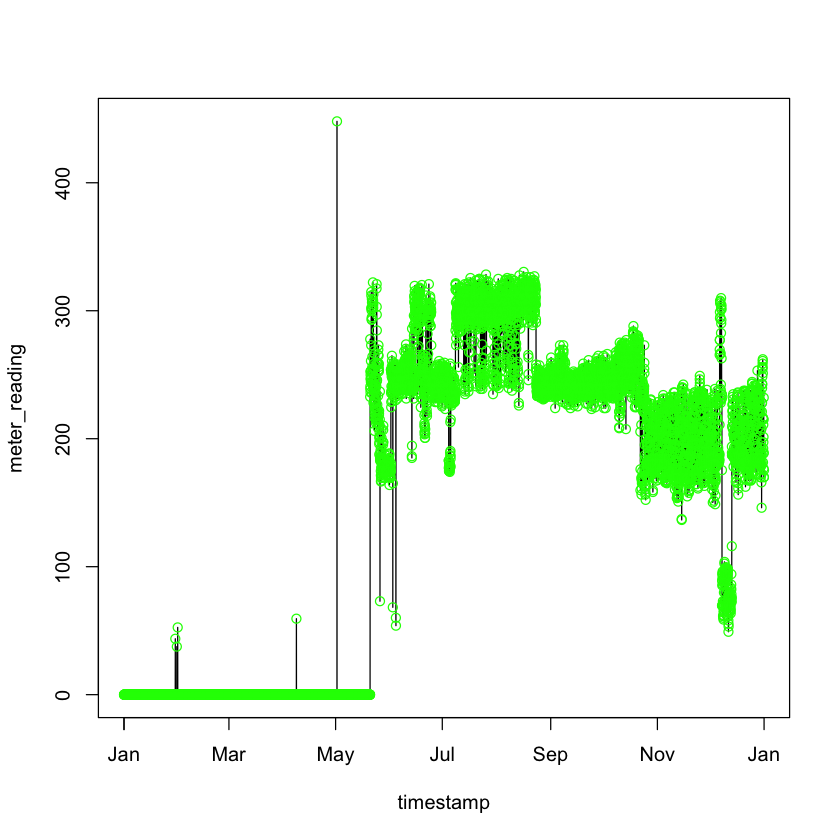

In [18]:
plot(train_elec_time_0, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_elec_time_0, col='green')

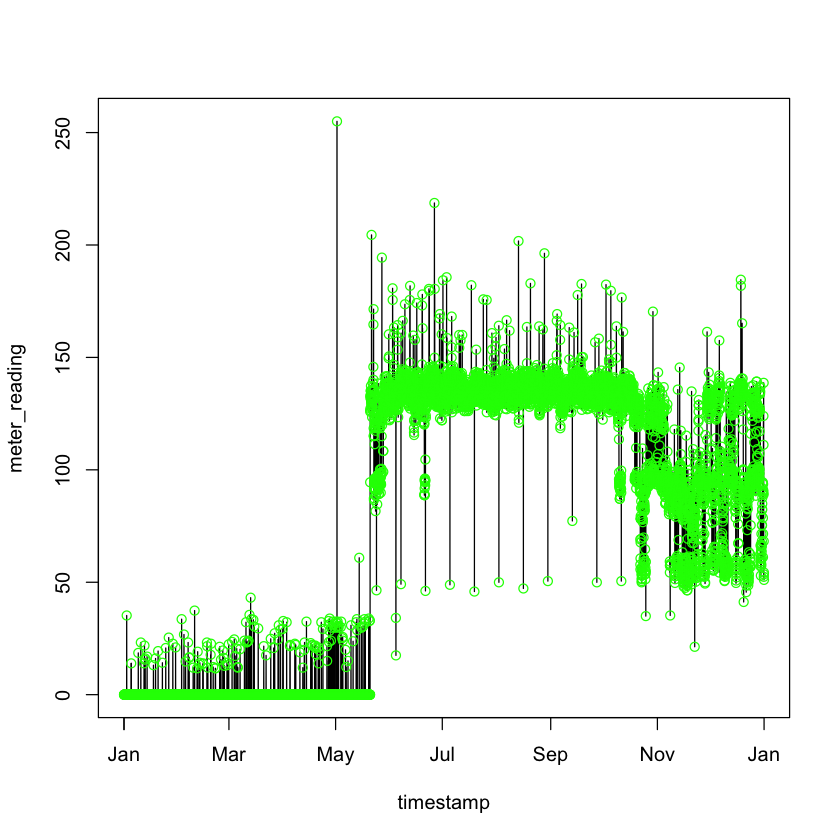

In [19]:
train_elec_1 = train_elec[building_id == 1]  # select the NO.1 building
train_elec_time_1 = train_elec_1[,.(timestamp, meter_reading)]
plot(train_elec_time_1, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_elec_time_1, col='green')

#### It does show strong seasonal component.

#### 2.2 chilledwater

In [14]:
train_chwater = train[meter == 1] # select chilledwater data
tail(train_chwater)

building_id,meter,timestamp,meter_reading
<int>,<int>,<dttm>,<dbl>
1408,1,2016-12-31 23:00:00,9.4152
1409,1,2016-12-31 23:00:00,18.8120
1410,1,2016-12-31 23:00:00,16.7000
1411,1,2016-12-31 23:00:00,0.0000
1412,1,2016-12-31 23:00:00,0.0000
1413,1,2016-12-31 23:00:00,2.5314


In [26]:
chwater_buildingnum = train_chwater[,.N,by=building_id]
head(chwater_buildingnum)

building_id,N
<int>,<int>
161,8783
162,8782
163,8783
166,8783
167,8783
168,8783


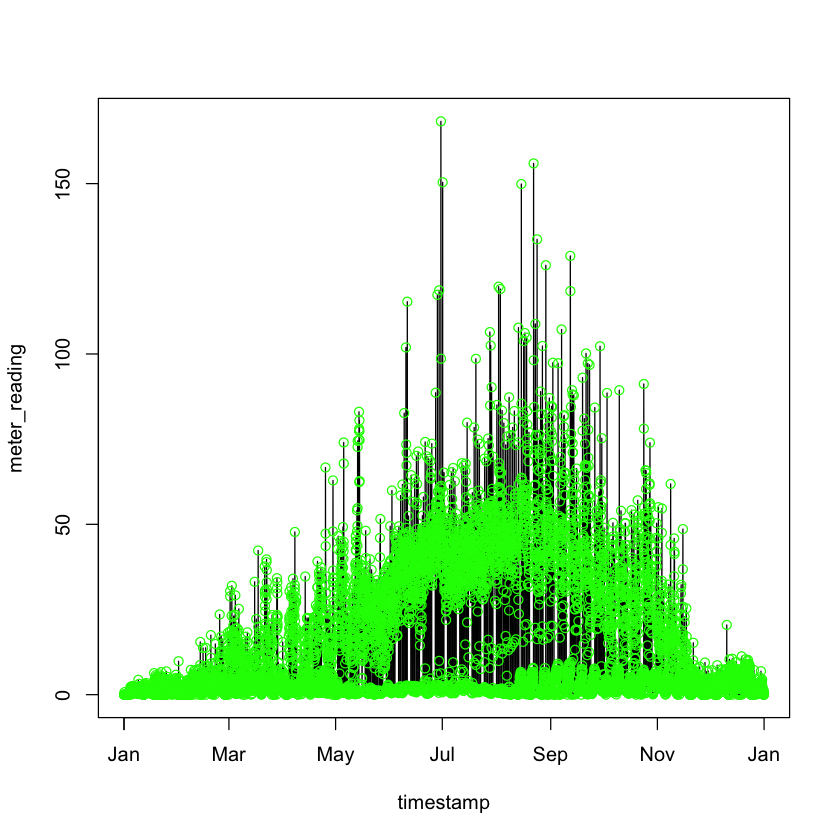

In [22]:
train_chwater_161 = train_chwater[building_id == 161]  # select the NO.161 building
train_chwater_time_161 = train_chwater_161[,.(timestamp, meter_reading)]
plot(train_chwater_time_161, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_chwater_time_161, col='green')

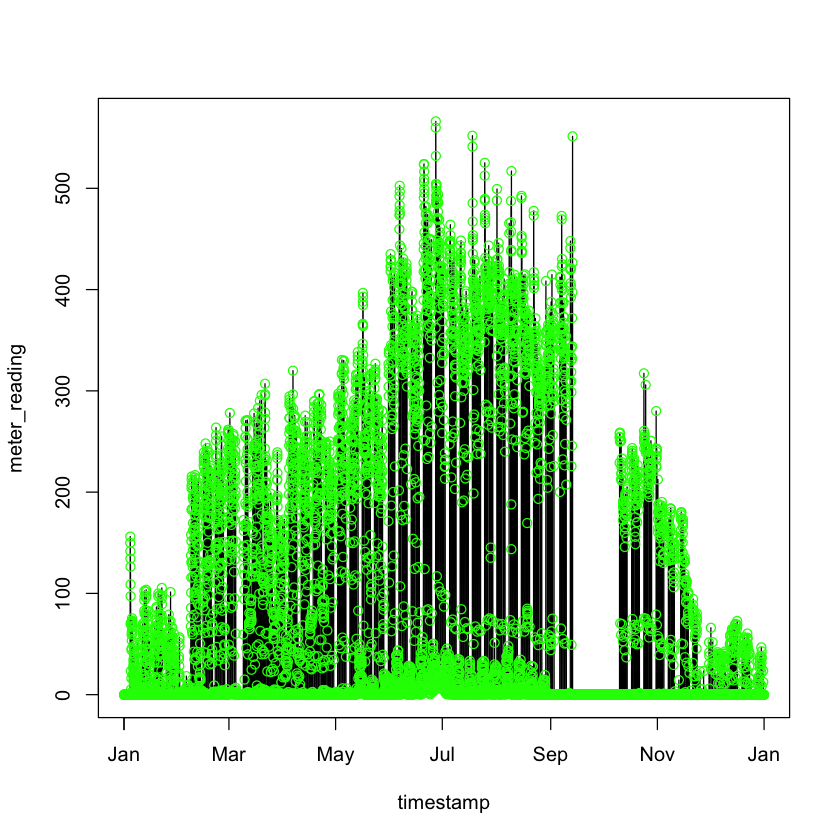

In [23]:
train_chwater_162 = train_chwater[building_id == 162]  # select the NO.162 building
train_chwater_time_162 = train_chwater_162[,.(timestamp, meter_reading)]
plot(train_chwater_time_162, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_chwater_time_162, col='green')

#### It does show strong seasonal component.

#### 2.3 steam

In [15]:
train_steam = train[meter == 2] # select steam data
tail(train_steam)

building_id,meter,timestamp,meter_reading
<int>,<int>,<dttm>,<dbl>
1433,2,2016-12-31 23:00:00,3173.8800
1434,2,2016-12-31 23:00:00,259.0730
1436,2,2016-12-31 23:00:00,1274.6600
1437,2,2016-12-31 23:00:00,1518.9200
1438,2,2016-12-31 23:00:00,852.7700
1442,2,2016-12-31 23:00:00,55.6241


In [30]:
steam_buildingnum = train_steam[,.N,by=building_id]
head(steam_buildingnum)

building_id,N
<int>,<int>
745,3378
747,8761
750,8783
751,8762
753,8783
754,8760


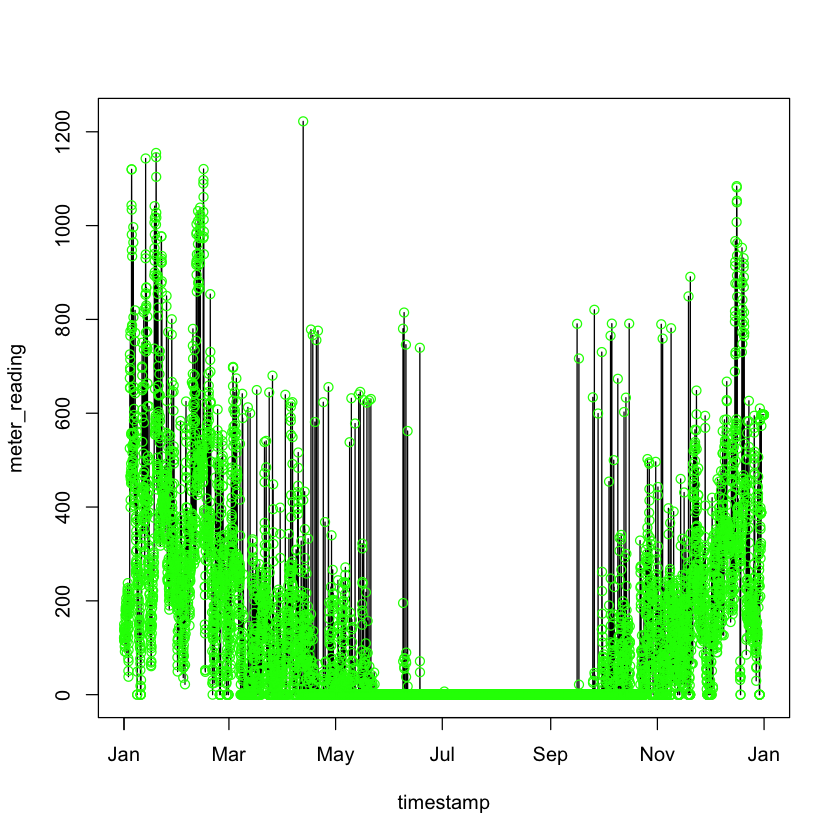

In [28]:
train_steam_747 = train_steam[building_id == 747]  # select the NO.747 building
train_steam_time_747 = train_steam_747[,.(timestamp, meter_reading)]
plot(train_steam_time_747, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_steam_time_747, col='green')

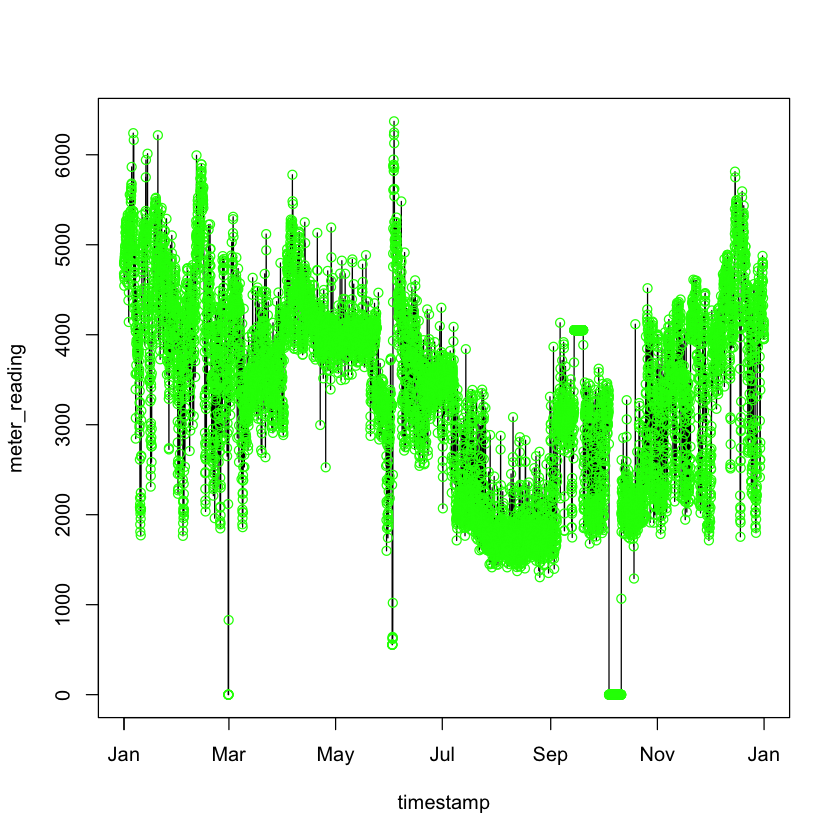

In [32]:
train_steam_750 = train_steam[building_id == 750]  # select the NO.1394 building
train_steam_time_750 = train_steam_750[,.(timestamp, meter_reading)]
plot(train_steam_time_750, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_steam_time_750, col='green')

#### It does show some seasonal component.

#### 2.4 hotwater

In [16]:
train_hwater = train[meter == 3] # select hotwater data
tail(train_hwater)

building_id,meter,timestamp,meter_reading
<int>,<int>,<dttm>,<dbl>
1321,3,2016-12-31 23:00:00,2108.790
1322,3,2016-12-31 23:00:00,2476.610
1323,3,2016-12-31 23:00:00,1909.330
1324,3,2016-12-31 23:00:00,364.019
1325,3,2016-12-31 23:00:00,156.050
1331,3,2016-12-31 23:00:00,8501.020


In [35]:
hwater_buildingnum = train_hwater[,.N,by=building_id]
head(hwater_buildingnum)

building_id,N
<int>,<int>
106,8780
109,8784
112,8779
113,8780
114,8784
117,8784


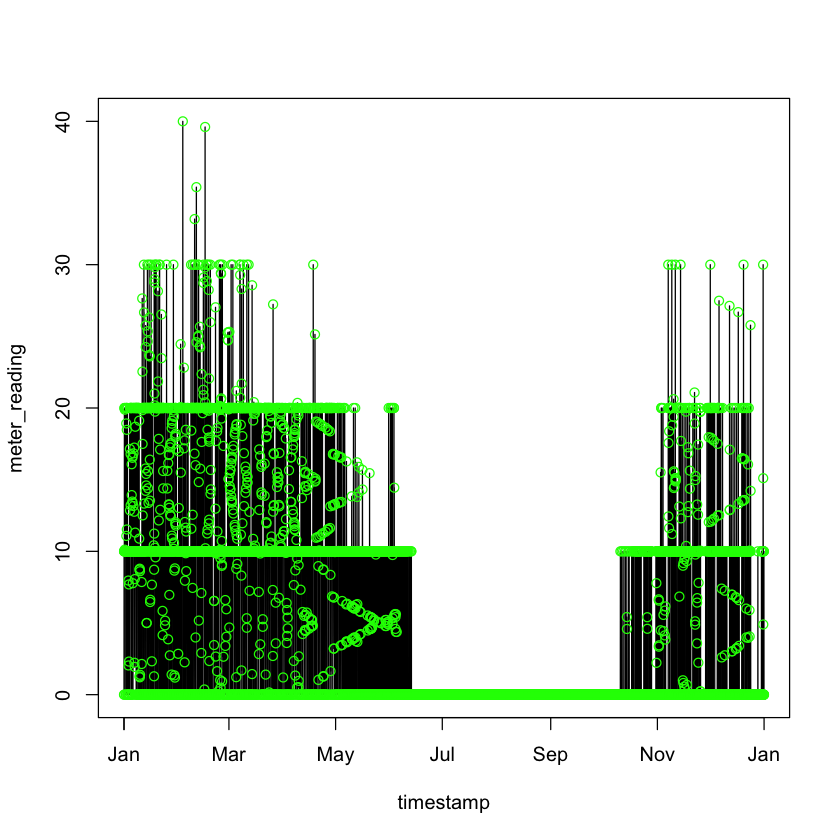

In [36]:
train_hwater_106 = train_hwater[building_id == 106]  # select the NO.106 building
train_hwater_time_106 = train_hwater_106[,.(timestamp, meter_reading)]
plot(train_hwater_time_106, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_hwater_time_106, col='green')

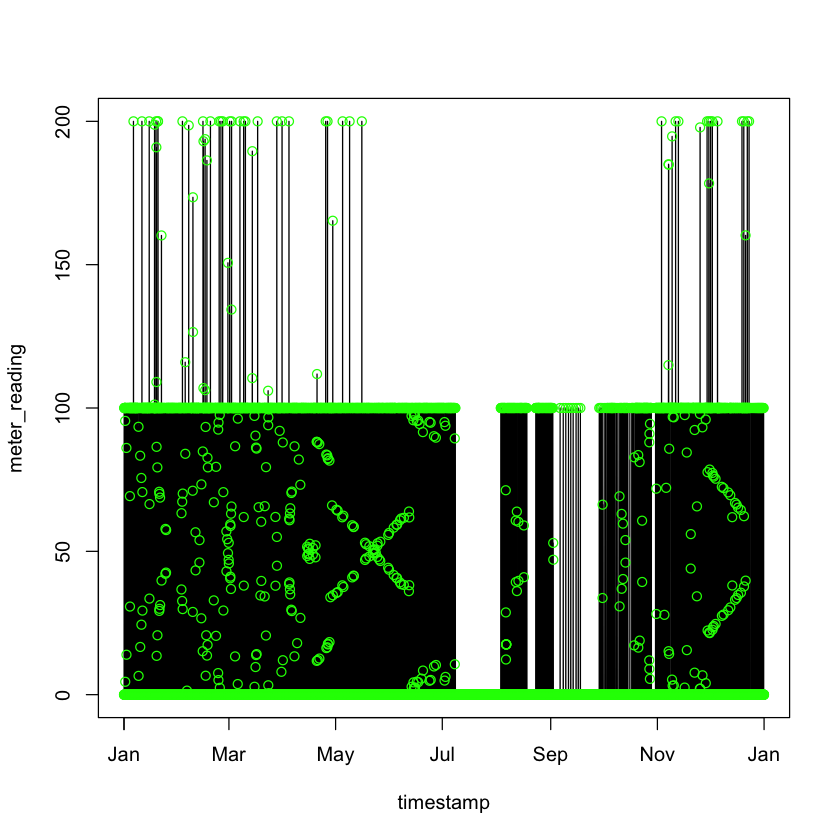

In [37]:
train_hwater_109 = train_hwater[building_id == 109]  # select the NO.109 building
train_hwater_time_109 = train_hwater_109[,.(timestamp, meter_reading)]
plot(train_hwater_time_109, ylab = 'meter_reading', xlab ='timestamp', type = 'l', col = 'black')
points(train_hwater_time_109, col='green')

#### It does show some seasonal component.